This example demonstrates how to get polygons from one or more country names using `earthkit.geo.polygons.country_polygons`.

It also demonstrates how to extract some data using ECMWF's [polytope](https://polytope.readthedocs.io/en/latest/) for the resulting polygon(s), and how to plot the result with [earthkit-plots](https://earthkit-plots.readthedocs.io/en/latest/).

In [4]:
import earthkit.data
import earthkit.geo.polygons
import earthkit.plots

request = {
    "class": "od",
    "stream" : "enfo",
    "type" : "pf",
    "date" : -1,  # Note: date must be within the last two days
    "time" : "1200",
    "levtype" : "sfc",
    "expver" : "0001",
    "domain" : "g",
    "param" : "167",
    "number" : "1",
    "step": "0",
    "feature": {
        "type": "polygon",
        "shape": earthkit.geo.polygons.country_polygons(["France", "Portugal"]),
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

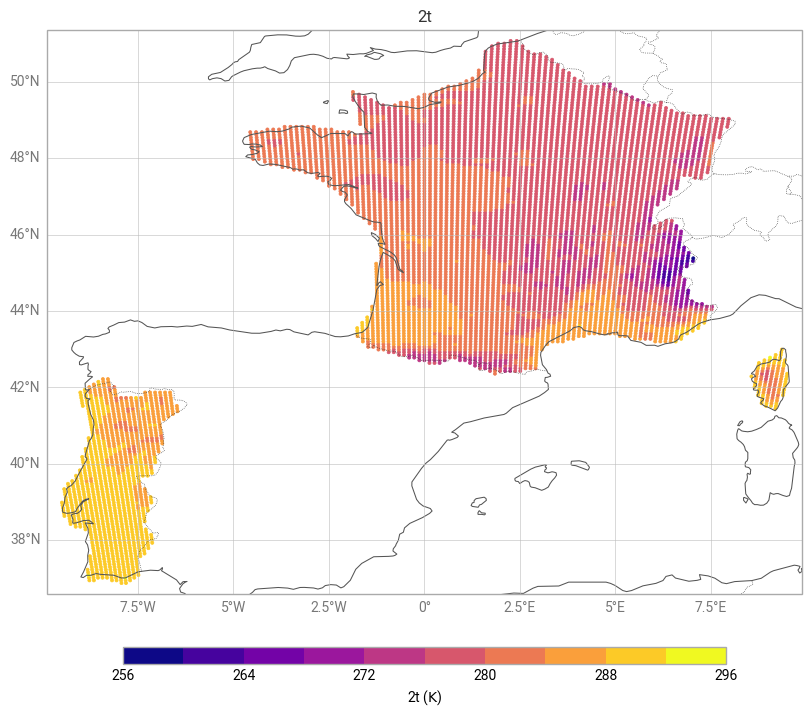

In [2]:
da = ds.to_xarray()

chart = earthkit.plots.Map()
chart.point_cloud(da["2t"], x="y", y="x")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name}")

chart.legend()

chart.show()